# Iris Flower Classification using ML Project

## ***Description***
*This Iris flower classification project is considered to as the “Hello World” of Machine Learning. The iris dataset contains three classes of flowers i.e. Versicolor, Setosa, Virginica, and each class contains 4 features, ‘Sepal length’, ‘Sepal width’, ‘Petal length’, ‘Petal width’. The aim of the iris flower classification is to predict flowers based on their specific features.*



## Importing some required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading dataset

In [2]:
features = ["sepal_length", "sepal_width","petal_length", "petal_width", "target_class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = features)

In [3]:
df.shape

(150, 5)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### *Dataset describing*

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target_class  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,target_class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target_class    0
dtype: int64

In [9]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,target_class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## *Dataset Visualisation*

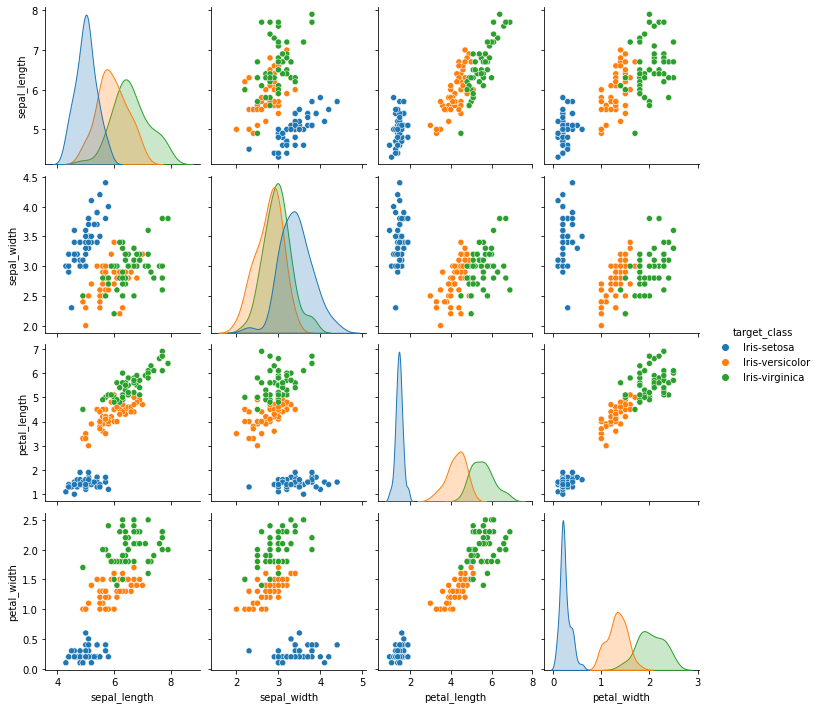

In [10]:
sns.pairplot(df, hue = 'target_class')

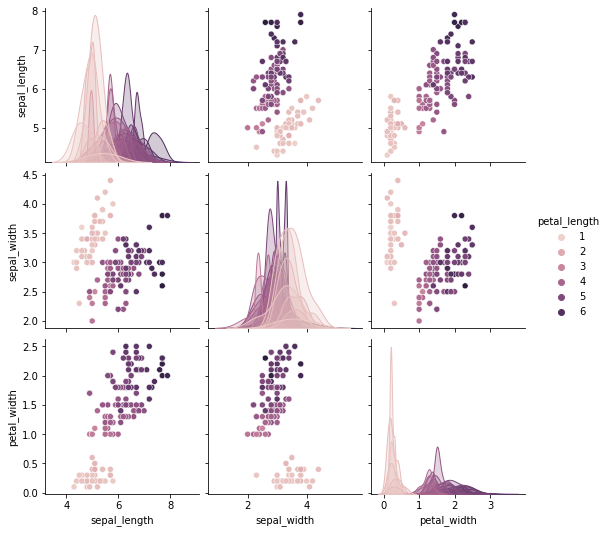

In [11]:
sns.pairplot(df, hue = 'petal_length')

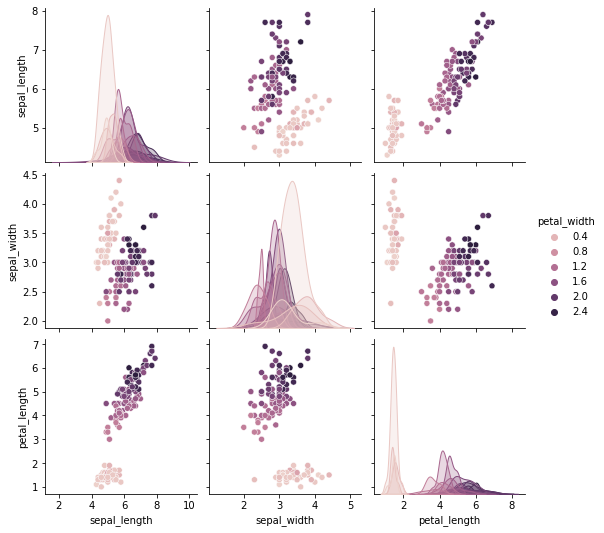

In [12]:
sns.pairplot(df, hue = 'petal_width')

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

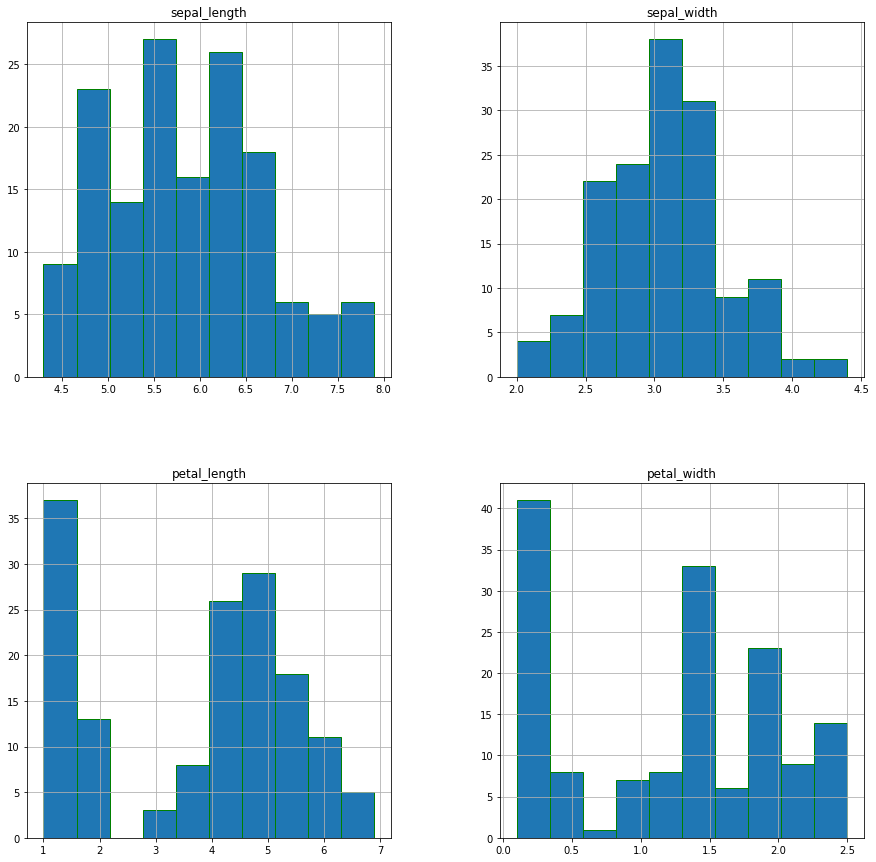

In [13]:
df.hist(edgecolor='green',figsize=(15,15))

<AxesSubplot:>

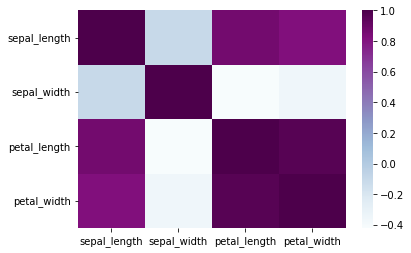

In [14]:
sns.heatmap(df.corr(method='pearson'), cmap="BuPu")


In [15]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [16]:
TargetClass = {}
TargetClass["Iris-setosa"] = (df["target_class"] == 'Iris-setosa').sum()
TargetClass["Iris-versicolor"] = (df["target_class"] == 'Iris-versicolor').sum()
TargetClass["Iris-virginica"] = (df["target_class"] == 'Iris-virginica').sum()

print(TargetClass)

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}


### *Visualising the above details using a pie chart*

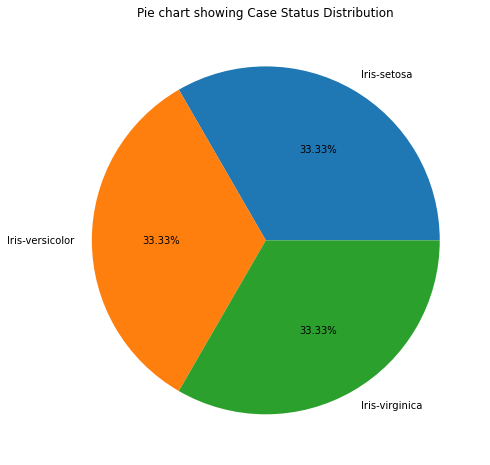

In [17]:
labels = []
count = []
for x, y in TargetClass.items():
    labels.append(x)
    count.append(y)
plt.figure(figsize = (8, 8))
plt.pie(count, labels=labels,autopct='%1.2f%%')
plt.title('Pie chart showing Case Status Distribution')
plt.show()


### *Separating the features and the target class*

In [18]:
a = df.drop('target_class', axis = 1)
b = df['target_class']

In [19]:
a.shape

(150, 4)

In [20]:
b.shape

(150,)

### *Splitting the dataset*

In [21]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2 ,random_state = 105 )

In [22]:
b_train.value_counts()

Iris-setosa        42
Iris-versicolor    41
Iris-virginica     37
Name: target_class, dtype: int64

### *Model Training*


In [23]:
LR = LogisticRegression()
LR.fit(a_train, b_train)
b_pred = LR.predict(a_test)

### *Model Evaluation*

In [24]:
accuracy = accuracy_score(b_test, b_pred)
print(accuracy*100,'%')

96.66666666666667 %


### *Plotting the classification matrix*

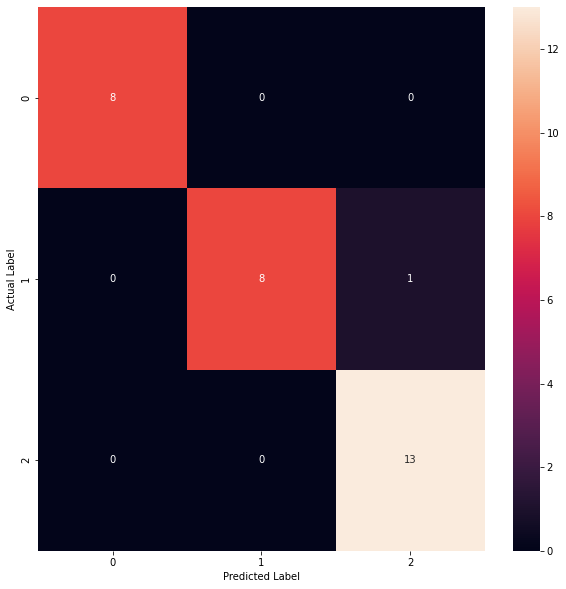

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 13]], dtype=int64)

In [25]:
plt.figure(figsize = (10, 10))
Classify = confusion_matrix(b_test, b_pred)
sns.heatmap(Classify,annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
Classify

### *Printing Classification Report*

In [26]:
print(classification_report(b_test, b_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



## Different types of classification Models

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)


# Importing some metrics for evaluating  models.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### *Logistic Regression*

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

# Model Training
classifier.fit(a_train, b_train)

# Predicting
b_Pred_Log = classifier.predict(a_test)

In [29]:
print("Accuracy of Log_Reg:", accuracy_score(b_test, b_Pred_Log)*100)

Accuracy of Log_Reg: 96.66666666666667


In [30]:
confusion_matrix(b_test,b_Pred_Log)

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 13]], dtype=int64)

In [31]:
print(classification_report(b_test, b_Pred_Log))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



### *k-Nearest Neighbors(KNN)*

In [32]:
# Model Creation
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Model Training
classifier.fit(a_train, b_train)

# Predicting
b_Pred_KNN = classifier.predict(a_test)

In [33]:
print(classification_report(b_test, b_Pred_KNN))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [34]:
print("Accuracy of KNN:", accuracy_score(b_test, b_Pred_KNN)*100)

Accuracy of KNN: 96.66666666666667


In [35]:
confusion_matrix(b_test,b_Pred_KNN)

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 13]], dtype=int64)

### *Linear Support Vector Machine (SVM)*

In [36]:
# Model Creation
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

# Model Training
classifier.fit(a_train, b_train)

# Predicting
b_Pred_LSVM = classifier.predict(a_test)

In [37]:
confusion_matrix(b_test,b_Pred_LSVM)

array([[ 8,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 13]], dtype=int64)

In [38]:
print(classification_report(b_test, b_Pred_LSVM))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.93        30
      macro avg       0.96      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



In [39]:
print("Accuracy of Linear SVM:", accuracy_score(b_test, b_Pred_LSVM)*100)

Accuracy of Linear SVM: 93.33333333333333


### *Kernel Support Vector Machine(SVM)*

In [40]:
# Model Creation
classifier = SVC(kernel = 'rbf', random_state = 0)

# Model Training
classifier.fit(a_train, b_train)

# Predicting
b_Pred_KSVM = classifier.predict(a_test)

In [41]:
confusion_matrix(b_test,b_Pred_KSVM)

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 13]], dtype=int64)

In [42]:
print(classification_report(b_test, b_Pred_KSVM))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [43]:
print("Accuracy of Kernel SVM:", accuracy_score(b_test, b_Pred_KSVM)*100)

Accuracy of Kernel SVM: 96.66666666666667


### *Decision Tree Classifier*

In [44]:
# Model Creation
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)

# Model Training
classifier.fit(a_train, b_train)

# Predicting
b_Pred_DT = classifier.predict(a_test)

In [45]:
confusion_matrix(b_test,b_Pred_DT)

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 13]], dtype=int64)

In [46]:
print(classification_report(b_test, b_Pred_DT))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [47]:
print("Accuracy of Decision Tree:", accuracy_score(b_test, b_Pred_DT)*100)

Accuracy of Decision Tree: 96.66666666666667


### *Naive Bayes*

In [48]:
# Model Creation
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# model Training
classifier.fit(a_train, b_train)

# Predicting
b_Pred_NB =classifier.predict(a_test)

In [49]:
confusion_matrix(b_test,b_Pred_NB)

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 13]], dtype=int64)

In [50]:
print(classification_report(b_test, b_Pred_NB))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [51]:
print("Accuracy of Naive Bayes:", accuracy_score(b_test, b_Pred_NB)*100)

Accuracy of Naive Bayes: 96.66666666666667


## *Conclusion*

In [52]:
# Model Evaluation Results
print("Accuracy of Logistic Regression Model:",accuracy_score(b_test, b_Pred_Log))
print("Accuracy of KNN Model:",accuracy_score(b_test,b_Pred_KNN))
print("Accuracy of Linear SVM Model:",accuracy_score(b_test,b_Pred_LSVM))
print("Accuracy of Kernel SVM Model:",accuracy_score(b_test,b_Pred_KSVM))
print("Accuracy of Naive Bayes Model:",accuracy_score(b_test, b_Pred_NB))
print("Accuracy of Decision Tree Model:",accuracy_score(b_test, b_Pred_DT))
print("Accuracy of Naive Bayes Model:",accuracy_score(b_test, b_Pred_NB))

Accuracy of Logistic Regression Model: 0.9666666666666667
Accuracy of KNN Model: 0.9666666666666667
Accuracy of Linear SVM Model: 0.9333333333333333
Accuracy of Kernel SVM Model: 0.9666666666666667
Accuracy of Naive Bayes Model: 0.9666666666666667
Accuracy of Decision Tree Model: 0.9666666666666667
Accuracy of Naive Bayes Model: 0.9666666666666667


# **Thank You!**